In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [105]:
data = pd.read_stata('ps2q2.dta')
data = data.sort_values(by=['lnAGE'])

In [25]:
data.head(2)

,award,age,lnAWARD,lnAGE
39,130.0,21.0,11.775290,3.044523
120,27.0,21.0,10.203592,3.044523


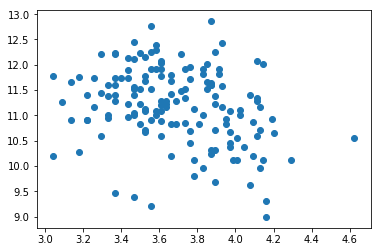

In [6]:
plt.scatter(data['lnAGE'],data['lnAWARD'])

In [104]:
Y = data['lnAWARD']
X = data['lnAGE']
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnAWARD   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     12.34
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           0.000588
Time:                        23:21:13   Log-Likelihood:                -163.67
No. Observations:                 150   AIC:                             331.3
Df Residuals:                     148   BIC:                             337.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7936      0.744     18.547      0.000      12.324      15.263
lnAGE         -0.7068      0.201     -3.513      0.001      -1.104      -0.309
==============================================================================
Omnibus:                        4.866   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.402
Skew:                          -0.399   Prob(JB):                        0.111
Kurtosis:                       3.258   Cond. No.                         49.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(2.5, 4.815630063446619)

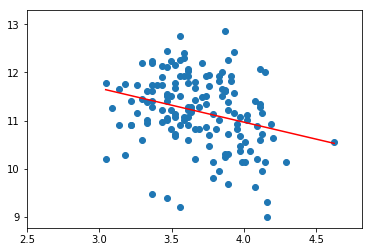

In [107]:
plt.scatter(data['lnAGE'],data['lnAWARD'])
plt.plot(X, X*-0.7068 + 13.7936, 'r')
plt.xlim(xmin=2.5)

In [17]:
np.corrcoef(data['lnAWARD'],data['lnAGE'])[1][0]

-0.2774426847937913

In [63]:
X = np.array(data['lnAGE']).reshape(-1,1)
X_new = np.hstack([X,(X)**2])
Y = np.array(data['lnAWARD']).reshape(-1,1)
model = LinearRegression()
model.fit(X_new,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
model.score(X_new,Y)

0.11589077026002226

In [65]:
model.intercept_

array([-4.409272], dtype=float32)

In [66]:
model.coef_

array([[ 9.186742 , -1.3358113]], dtype=float32)

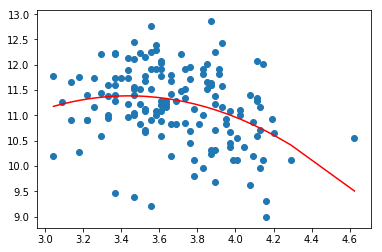

In [77]:
plt.scatter(X,Y)
plt.plot(X,model.predict(X_new),'r')

In [83]:
X_new.shape

(150, 2)

In [88]:
model.predict(np.array([[3.0445],[9.2691]]).reshape(1,2))

array([[11.17799518]])

In [95]:
data2 = pd.read_stata('ps2q2.dta')
data2 = data.sort_values(by=['lnAGE'])

In [97]:
data2['lnAGEsq'] = data2['lnAGE']**2
data2.head()


,award,age,lnAWARD,lnAGE,lnAGEsq
39,130.0,21.0,11.775290,3.044523,9.269117
120,27.0,21.0,10.203592,3.044523,9.269117
53,78.0,22.0,11.264464,3.091043,9.554543
101,55.0,23.0,10.915089,3.135494,9.831324
144,115.0,23.0,11.652687,3.135494,9.831324


In [100]:
Y = data2['lnAGE']
X = data2['lnAGEsq']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnAGE   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 5.735e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):          1.59e-193
Time:                        22:50:30   Log-Likelihood:                 417.77
No. Observations:                 150   AIC:                            -831.5
Df Residuals:                     148   BIC:                            -825.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8446      0.008    237.065      0.000       1.829       1.860
lnAGEsq        0.1347      0.001    239.479      0.000       0.134       0.136
==============================================================================
Omnibus:                      122.217   Durbin-Watson:                   0.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1314.161
Skew:                          -2.915   Prob(JB):                    4.30e-286
Kurtosis:                      16.277   Cond. No.                         88.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
resids = pd.Series(model.resid)

In [103]:
Y = data2['lnAWARD']
X = resids
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnAWARD   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     5.125
Date:                Sun, 23 Sep 2018   Prob (F-statistic):             0.0250
Time:                        22:53:50   Log-Likelihood:                -167.12
No. Observations:                 150   AIC:                             338.2
Df Residuals:                     148   BIC:                             344.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1891      0.061    184.624      0.000      11.069      11.309
0              9.1867      4.058      2.264      0.025       1.167      17.206
==============================================================================
Omnibus:                        6.375   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.289
Skew:                          -0.501   Prob(JB):                       0.0431
Kurtosis:                       3.051   Cond. No.                         67.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""